In [57]:
import numpy as np
import gensim, logging
import csv, string
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

directory_prefix = "../"
num_of_patents = 50
label_depth = 3


all_labels = {"A01B","A01C","A01D","A01F","A01G","A01H","A01J","A01K","A01L","A01M","A01N","A21B","A21C","A21D","A22B","A22C","A23B","A23C","A23D","A23F","A23G","A23J","A23K","A23L","A23N","A23P","A23V","A23Y","A24B","A24C","A24D","A24F","A41B","A41C","A41D","A41F","A41G","A41H","A42B","A42C","A43B","A43C","A43D","A44B","A44C","A44D","A45B","A45C","A45D","A45F","A46B","A46D","A47B","A47C","A47D","A47F","A47G","A47H","A47J","A47K","A47L","A61B","A61C","A61D","A61F","A61G","A61H","A61J","A61K","A61L","A61M","A61N","A61P","A61Q","A62B","A62C","A62D","A63B","A63C","A63D","A63F","A63G","A63H","A63J","A63K","A99Z","B01B","B01D","B01F","B01J","B01L","B02B","B02C","B03B","B03C","B03D","B04B","B04C","B05B","B05C","B05D","B06B","B07B","B07C","B08B","B09B","B09C","B21B","B21C","B21D","B21F","B21G","B21H","B21J","B21K","B21L","B22C","B22D","B22F","B23B","B23C","B23D","B23F","B23G","B23H","B23K","B23P","B23Q","B24B","B24C","B24D","B25B","B25C","B25D","B25F","B25G","B25H","B25J","B26B","B26D","B26F","B27B","B27C","B27D","B27F","B27G","B27H","B27J","B27K","B27L","B27M","B27N","B28B","B28C","B28D","B29B","B29C","B29D","B29K","B29L","B30B","B31B","B31C","B31D","B31F","B32B","B33Y","B41B","B41C","B41D","B41F","B41G","B41J","B41K","B41L","B41M","B41N","B41P","B42B","B42C","B42D","B42F","B42P","B43K","B43L","B43M","B44B","B44C","B44D","B44F","B60B","B60C","B60D","B60F","B60G","B60H","B60J","B60K","B60L","B60M","B60N","B60P","B60Q","B60R","B60S","B60T","B60V","B60W","B60Y","B61B","B61C","B61D","B61F","B61G","B61H","B61J","B61K","B61L","B62B","B62C","B62D","B62H","B62J","B62K","B62L","B62M","B63B","B63C","B63G","B63H","B63J","B64B","B64C","B64D","B64F","B64G","B65B","B65C","B65D","B65F","B65G","B65H","B66B","B66C","B66D","B66F","B67B","B67C","B67D","B68B","B68C","B68F","B68G","B81B","B81C","B82B","B82Y","B99Z","C01B","C01C","C01D","C01F","C01G","C01P","C02F","C03B","C03C","C04B","C05B","C05C","C05D","C05F","C05G","C06B","C06C","C06D","C06F","C07B","C07C","C07D","C07F","C07G","C07H","C07J","C07K","C08B","C08C","C08F","C08G","C08H","C08J","C08K","C08L","C09B","C09C","C09D","C09F","C09G","C09H","C09J","C09K","C10B","C10C","C10F","C10G","C10H","C10J","C10K","C10L","C10M","C10N","C11B","C11C","C11D","C12C","C12F","C12G","C12H","C12J","C12L","C12M","C12N","C12P","C12Q","C12R","C12Y","C13B","C13K","C14B","C14C","C21B","C21C","C21D","C22B","C22C","C22F","C23C","C23D","C23F","C23G","C25B","C25C","C25D","C25F","C30B","C40B","C99Z","D01B","D01C","D01D","D01F","D01G","D01H","D02G","D02H","D02J","D03C","D03D","D03J","D04B","D04C","D04D","D04G","D04H","D05B","D05C","D05D","D06B","D06C","D06F","D06G","D06H","D06J","D06L","D06M","D06N","D06P","D06Q","D07B","D10B","D21B","D21C","D21D","D21F","D21G","D21H","D21J","D99Z","E01B","E01C","E01D","E01F","E01H","E02B","E02C","E02D","E02F","E03B","E03C","E03D","E03F","E04B","E04C","E04D","E04F","E04G","E04H","E05B","E05C","E05D","E05F","E05G","E05Y","E06B","E06C","E21B","E21C","E21D","E21F","E99Z","F01B","F01C","F01D","F01K","F01L","F01M","F01N","F01P","F02B","F02C","F02D","F02F","F02G","F02K","F02M","F02N","F02P","F03B","F03C","F03D","F03G","F03H","F04B","F04C","F04D","F04F","F05B","F05C","F05D","F15B","F15C","F15D","F16B","F16C","F16D","F16F","F16G","F16H","F16J","F16K","F16L","F16M","F16N","F16P","F16S","F16T","F17B","F17C","F17D","F21H","F21K","F21L","F21S","F21V","F21W","F21Y","F22B","F22D","F22G","F23B","F23C","F23D","F23G","F23H","F23J","F23K","F23L","F23M","F23N","F23Q","F23R","F24B","F24C","F24D","F24F","F24H","F24S","F24T","F24V","F25B","F25C","F25D","F25J","F26B","F27B","F27D","F27M","F28B","F28C","F28D","F28F","F28G","F41A","F41B","F41C","F41F","F41G","F41H","F41J","F42B","F42C","F42D","F99Z","G01B","G01C","G01D","G01F","G01G","G01H","G01J","G01K","G01L","G01M","G01N","G01P","G01Q","G01R","G01S","G01T","G01V","G01W","G02B","G02C","G02F","G03B","G03C","G03D","G03F","G03G","G03H","G04B","G04C","G04D","G04F","G04G","G04R","G05B","G05D","G05F","G05G","G06C","G06D","G06E","G06F","G06G","G06J","G06K","G06M","G06N","G06Q","G06T","G07B","G07C","G07D","G07F","G07G","G08B","G08C","G08G","G09B","G09C","G09D","G09F","G09G","G10B","G10C","G10D","G10F","G10G","G10H","G10K","G10L","G11B","G11C","G12B","G16B","G16C","G16H","G16Z","G21B","G21C","G21D","G21F","G21G","G21H","G21J","G21K","G99Z","H01B","H01C","H01F","H01G","H01H","H01J","H01K","H01L","H01M","H01P","H01Q","H01R","H01S","H01T","H02B","H02G","H02H","H02J","H02K","H02M","H02N","H02P","H02S","H03B","H03C","H03D","H03F","H03G","H03H","H03J","H03K","H03L","H03M","H04B","H04H","H04J","H04K","H04L","H04M","H04N","H04Q","H04R","H04S","H04T","H04W","H05B","H05C","H05F","H05G","H05H","H05K","H99Z","Y02A","Y02B","Y02C","Y02D","Y02E","Y02P","Y02T","Y02W","Y04S","Y10S","Y10T"}
all_labels = {k[:label_depth] for k in all_labels}
print(all_labels)

{'D04', 'A61', 'F27', 'C01', 'B66', 'C40', 'H04', 'B61', 'D03', 'C08', 'H02', 'B06', 'C07', 'G16', 'F03', 'B03', 'B68', 'B30', 'F21', 'F15', 'C11', 'A47', 'B63', 'A01', 'E03', 'A42', 'H03', 'D10', 'E04', 'B09', 'B41', 'G08', 'B65', 'C05', 'A44', 'B01', 'A41', 'B24', 'A43', 'H01', 'H99', 'B31', 'G06', 'B82', 'B29', 'F24', 'A63', 'E05', 'A22', 'D05', 'A45', 'F05', 'C12', 'D01', 'G01', 'F16', 'D02', 'B42', 'F23', 'B62', 'G05', 'E99', 'G11', 'D07', 'G21', 'B99', 'B22', 'B21', 'A62', 'G10', 'D99', 'G03', 'A24', 'C22', 'F17', 'C10', 'C30', 'A21', 'F04', 'G07', 'B23', 'D21', 'A99', 'B05', 'Y02', 'C14', 'E02', 'F22', 'G99', 'B81', 'C23', 'B67', 'C03', 'C13', 'B64', 'E01', 'F02', 'Y10', 'B32', 'F26', 'H05', 'B26', 'C21', 'B60', 'A23', 'F42', 'F28', 'B27', 'F99', 'B04', 'F01', 'B02', 'F25', 'B08', 'B43', 'B07', 'E06', 'Y04', 'B44', 'C09', 'B33', 'C04', 'C06', 'C99', 'F41', 'B28', 'G02', 'C25', 'B25', 'D06', 'A46', 'G04', 'G12', 'G09', 'E21', 'C02'}


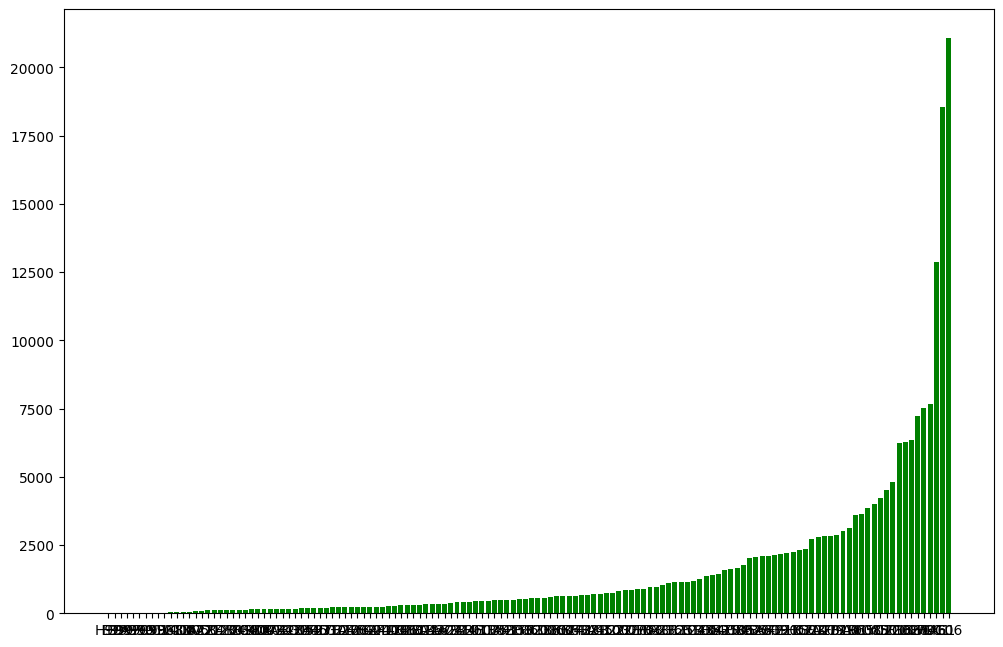

In [235]:
dataset = {k: [] for k in all_labels}
occurences = {k: 0 for k in all_labels}
current_dataframe = pd.read_csv(directory_prefix+'datasets/claims_dataset_1.csv',sep=',', header = None).to_numpy()#, chunksize=100000)

for row in current_dataframe:
    label, description=row[0], row[1]+row[2]
    label_vectors = [z.strip().strip('\'\"')[:label_depth] for z in label.split(',')]
    label_vectors = list(set([i for i in label_vectors if i in all_labels]))
    #skip = False
    #for i in label_vectors:
    #    if occurences[i] >= num_of_patents:
    #        skip = True
    #if skip:
    #    continue

    for i in label_vectors:
        occurences[i] = occurences[i]+1
        dataset[i].append((label_vectors, description))
    #if sum([occurences[i] for i in label_vectors]) >= num_of_patents*len(label_vectors):
    #    continue
        

keys = sorted(occurences.keys(), key=lambda x: occurences[x])
vals = sorted(occurences.values())
plt.bar(keys, vals, color='g')
plt.show()

In [214]:
from math import log
max_of_occurences = max(list(occurences.values()))
print(occurences)
med = np.median(list(occurences.values()))
print(max_of_occurences, med)
n = 1
def compress(x):
    return log(x)/log(100)

dataset_weights = {k: occurences[k]/max_of_occurences if occurences[k] != 0  else 1 for k in occurences}
print(dataset_weights)
dataset_weights = {k: int(v*100) for k, v in dataset_weights.items()}
dataset_weights = {k: v*10 if v < med else v for k, v in dataset_weights.items()}

print(dataset_weights)


{'D04': 278, 'A61': 18543, 'F27': 193, 'C01': 1155, 'B66': 620, 'C40': 141, 'H04': 7529, 'B61': 316, 'D03': 160, 'C08': 3870, 'H02': 2326, 'B06': 188, 'C07': 6350, 'G16': 1120, 'F03': 542, 'B03': 164, 'B68': 41, 'B30': 137, 'F21': 2166, 'F15': 502, 'C11': 457, 'A47': 2824, 'B63': 651, 'A01': 3605, 'E03': 465, 'A42': 167, 'H03': 974, 'D10': 213, 'E04': 1410, 'B09': 135, 'B41': 1450, 'G08': 1613, 'B65': 3625, 'C05': 180, 'A44': 248, 'B01': 4817, 'A41': 499, 'B24': 404, 'A43': 338, 'H01': 7662, 'H99': 0, 'B31': 193, 'G06': 21079, 'B82': 489, 'B29': 3032, 'F24': 1178, 'A63': 2086, 'E05': 885, 'A22': 96, 'D05': 77, 'A45': 701, 'F05': 1777, 'C12': 4519, 'D01': 286, 'G01': 12885, 'F16': 6242, 'D02': 109, 'B42': 170, 'F23': 557, 'B62': 2033, 'G05': 4005, 'E99': 0, 'G11': 1133, 'D07': 51, 'G21': 213, 'B99': 0, 'B22': 756, 'B21': 693, 'A62': 358, 'G10': 732, 'D99': 0, 'G03': 2711, 'A24': 386, 'C22': 833, 'F17': 262, 'C10': 884, 'C30': 175, 'A21': 105, 'F04': 1674, 'G07': 870, 'B23': 2072, 'D21':

In [186]:
for k in dataset.keys():
    dataset[k] = sorted(dataset[k], key=lambda x: len(x[1]))
    

4
H99


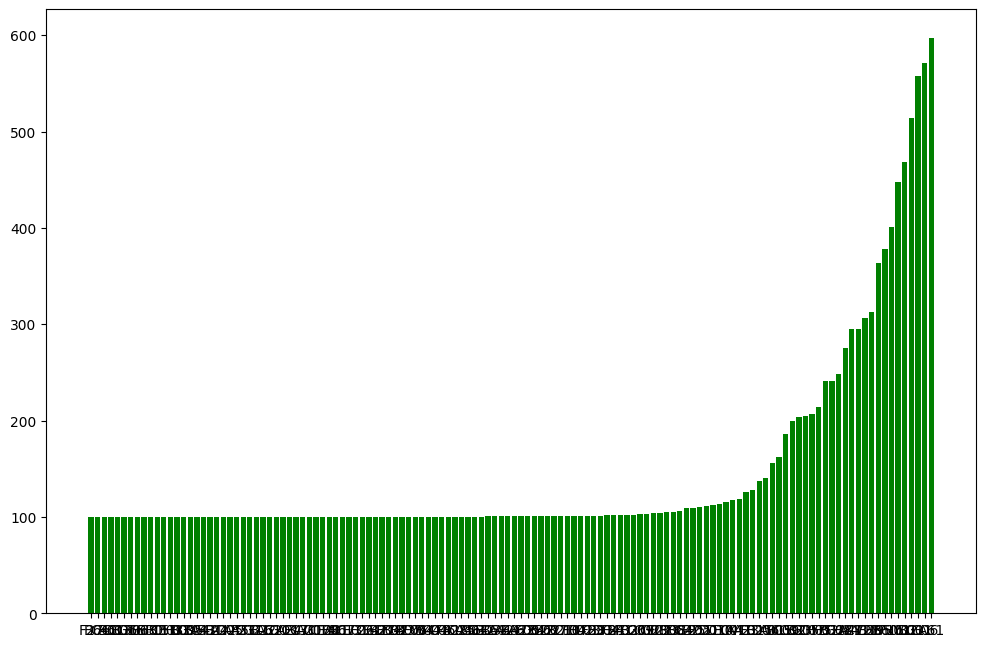

In [236]:
balanced = []
new_occurences = {k: 0 for k in all_labels}
print(min([len(dataset[k]) for k in dataset if dataset[k] != []]))
import random
k = sorted(occurences.keys(), key=lambda x: occurences[x])[0]
print(k)
while new_occurences[k] < 100:
    if dataset[k] == []:
        del dataset[k]
        del occurences[k]
        del new_occurences[k]
        k = sorted(new_occurences.keys(), key=lambda x: new_occurences[x])[0]
        continue
    label_vectors, description = random.choice(dataset[k])
    for i in label_vectors:
        new_occurences[i] = new_occurences[i]+1
    balanced.append((label_vectors, description))
    k = sorted(new_occurences.keys(), key=lambda x: new_occurences[x])[0]
    #print(k)

keys = sorted(new_occurences.keys(), key=lambda x: new_occurences[x])
vals = sorted(new_occurences.values())
plt.bar(keys, vals, color='g')
plt.show()
    

In [230]:
print(len(balanced))
with open(directory_prefix+'datasets/balanced_test_dataset_label_depth_3.csv', mode='w') as file:
    writer = csv.writer(file, delimiter=',', quotechar="\"", quoting=csv.QUOTE_MINIMAL)
    for label_vectors, description in balanced:
        #print(label_vectors, description)
        writer.writerow(["\""+','.join(label_vectors)+"\"", "\""+description+"\""])

547


In [229]:
len(set([i[1] for i in balanced]))

526